<a href="https://colab.research.google.com/github/Naty-2906/Portafolio/blob/Portafolio-Ciencia-de-Datos/etapa_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


In [64]:
%pip install wbgapi

In [65]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/UDP-CcsDatos2025-2')

import my_func as fn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [67]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [68]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [69]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [70]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [71]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


# Análisis Descriptivo e Imputación de Datos

In [72]:
paises = df_wb_raw

In [73]:
paises.tail(10)

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
188,AUS,Australia,High,2.434507,26659922.0,13432672.0,50.385263,13227250.0,49.614737,2.608821,...,125.171501,85.629341,85.100,83.051220,81.100,100.00,100.0,NaN,NaN,97.0631
189,ABW,Aruba,Low,0.045652,107359.0,56653.0,52.769620,50706.0,47.230380,-0.028616,...,NaN,NaN,78.779,76.353000,73.702,NaN,NaN,NaN,NaN,NaN
190,ARM,Armenia,Medium,-0.165164,2964300.0,1589229.0,53.612277,1375071.0,46.387723,0.037852,...,63.826009,48.750546,81.000,77.465854,74.100,97.35,99.8,NaN,NaN,79.9966
191,ARG,Argentina,High,0.286976,45538401.0,22941417.0,50.378178,22596984.0,49.621822,0.375605,...,140.191734,76.922092,79.875,77.395000,74.805,98.20,99.9,89.0300,89.44,89.2290
192,ATG,Antigua and Barbuda,Low,0.511400,93316.0,48908.0,52.410652,44408.0,47.589348,0.263320,...,NaN,NaN,80.294,77.598000,74.549,100.00,100.0,NaN,NaN,77.5756
193,AGO,Angola,Medium-High,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,9.933616,10.165600,67.144,64.617000,62.099,8.40,75.0,NaN,NaN,44.7581
194,AND,Andorra,Low,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,68.003820,57.193764,86.107,84.041000,82.100,100.00,100.0,NaN,NaN,95.4456
195,DZA,Algeria,High,1.498976,46164219.0,22614984.0,48.988123,23549235.0,51.011877,2.241995,...,67.258843,44.258295,77.696,76.261000,74.895,99.10,99.9,NaN,NaN,76.9081
196,ALB,Albania,Medium-Low,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,77.031527,52.749937,81.446,79.602000,77.728,72.50,95.2,81.7239,84.59,83.1356
197,AFG,Afghanistan,Medium,2.135594,41454761.0,20530683.0,49.525513,20924078.0,50.474487,2.446706,...,NaN,NaN,67.536,66.035000,64.467,20.40,87.0,NaN,NaN,17.7089


Identificar el número de países, años y variables disponibles.

In [74]:
paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   country                  198 non-null    object  
 1   Country                  198 non-null    object  
 2   NY.GDP.MKTP.PP.KD        198 non-null    category
 3   SP.POP.GROW              198 non-null    float64 
 4   SP.POP.TOTL              198 non-null    float64 
 5   SP.POP.TOTL.FE.IN        198 non-null    float64 
 6   SP.POP.TOTL.FE.ZS        198 non-null    float64 
 7   SP.POP.TOTL.MA.IN        198 non-null    float64 
 8   SP.POP.TOTL.MA.ZS        198 non-null    float64 
 9   SP.URB.GROW              198 non-null    float64 
 10  SP.URB.TOTL              198 non-null    float64 
 11  SP.URB.TOTL.IN.ZS        198 non-null    float64 
 12  SL.TLF.TOTL.FE.ZS        173 non-null    float64 
 13  SL.TLF.TOTL.IN           173 non-null    float64 
 14  SL.UEM.TOT

Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 10% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

In [75]:
porcentaje_nulos = paises.isna().mean() * 100
print(porcentaje_nulos)

country               0.000000
Country               0.000000
NY.GDP.MKTP.PP.KD     0.000000
SP.POP.GROW           0.000000
SP.POP.TOTL           0.000000
                       ...    
EG.CFT.ACCS.RU.ZS     8.080808
EG.CFT.ACCS.UR.ZS     8.080808
IT.NET.USER.FE.ZS    71.212121
IT.NET.USER.MA.ZS    71.212121
IT.NET.USER.ZS       10.606061
Length: 67, dtype: float64


Podemos apreciar que hay columnas con muchos valores nulos por lo cual es recomendado imputar

Existen variables con un alto volumen de datos faltantes. Usaremos la siguiente regla para el tratamiento de los mismos:
- Si 'NaN' > 10% Se procede a eliminar la variable.
- Si 'NaN' < 10% Se procede a imputar datos.

In [76]:
#Generar un condición booleaba es decir que puee
#tomar dos valores siendo mayor a 10% o menor a 10%
condicion = paises.isna().mean()>0.10
#columnas con valores nulos
drop_columnas = list(paises.isna().mean()[condicion].index)
#eliminar las columnas seleccionadas
paises = paises.drop(columns=drop_columnas)

In [77]:
paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   country                  198 non-null    object  
 1   Country                  198 non-null    object  
 2   NY.GDP.MKTP.PP.KD        198 non-null    category
 3   SP.POP.GROW              198 non-null    float64 
 4   SP.POP.TOTL              198 non-null    float64 
 5   SP.POP.TOTL.FE.IN        198 non-null    float64 
 6   SP.POP.TOTL.FE.ZS        198 non-null    float64 
 7   SP.POP.TOTL.MA.IN        198 non-null    float64 
 8   SP.POP.TOTL.MA.ZS        198 non-null    float64 
 9   SP.URB.GROW              198 non-null    float64 
 10  SP.URB.TOTL              198 non-null    float64 
 11  SP.URB.TOTL.IN.ZS        198 non-null    float64 
 12  SP.RUR.TOTL              198 non-null    float64 
 13  SP.RUR.TOTL.ZG           189 non-null    float64 
 14  SP.RUR.TOT

pasamos de 67 columnas a 31 columnas en la base de datos

In [78]:
print(f'El dataframe contiene {paises.shape[0]} filas y {paises.shape[1]} columnas, de las cuales {len(paises.isna().sum()[paises.isna().mean()>0].index)} contienen registros nulos bajo el 10%')

El dataframe contiene 198 filas y 31 columnas, de las cuales 14 contienen registros nulos bajo el 10%


Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

In [79]:
paises.describe()

,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.RUR.TOTL,...,NV.SRV.TOTL.CN,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS
count,198.000000,1.980000e+02,1.980000e+02,198.000000,1.980000e+02,198.000000,198.000000,1.980000e+02,198.000000,1.980000e+02,...,1.880000e+02,1.970000e+02,195.000000,190.000000,182.000000,198.000000,198.000000,198.000000,182.000000,182.000000
mean,1.152752,3.999611e+07,1.987776e+07,49.973491,2.011836e+07,50.026509,1.729545,2.289674e+07,62.205392,1.709937e+07,...,5.135587e+14,5.188427e+09,3.535907,16.892307,70.320055,76.119303,73.476060,70.910354,62.271154,78.501099
std,1.576210,1.484957e+08,7.252840e+07,2.993389,7.598056e+07,2.993389,1.826024,8.019058e+07,22.722526,7.663858e+07,...,5.658617e+15,4.552765e+10,12.988987,108.043670,36.478377,7.221813,7.085527,7.104323,41.324522,32.394985
min,-8.423008,9.816000e+03,4.795000e+03,28.483741,5.021000e+03,45.079120,-8.348151,6.283000e+03,15.058102,0.000000e+00,...,1.838905e+08,-3.614270e+11,-63.154669,0.000000,0.100000,54.743000,54.462000,53.195000,0.000000,0.100000
25%,0.282878,1.373786e+06,6.876850e+05,49.651875,6.826450e+05,48.810555,0.452315,8.540478e+05,43.361856,4.134135e+05,...,4.562829e+10,0.000000e+00,0.599463,0.137450,39.800000,70.733000,67.713000,65.379000,11.062500,69.650000
50%,1.112108,7.335048e+06,3.672054e+06,50.329281,3.560820e+06,49.670719,1.524572,4.463172e+06,63.622523,1.983892e+06,...,5.390941e+11,3.677550e+07,2.090288,1.408550,91.500000,77.486500,74.292890,70.666000,84.150000,97.600000
75%,2.088224,2.936413e+07,1.403224e+07,51.189445,1.424457e+07,50.348125,2.700316,1.624560e+07,79.546096,1.024225e+07,...,5.703765e+12,1.019960e+09,4.326629,5.203450,100.000000,81.700000,78.485976,75.803000,100.000000,100.000000
max,6.527050,1.438070e+09,6.961863e+08,54.920880,7.418833e+08,71.516259,8.105580,9.244403e+08,100.000000,9.337718e+08,...,7.703243e+16,3.510850e+11,111.222080,1456.092000,100.000000,88.090000,85.706000,84.206000,100.000000,100.000000


Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo

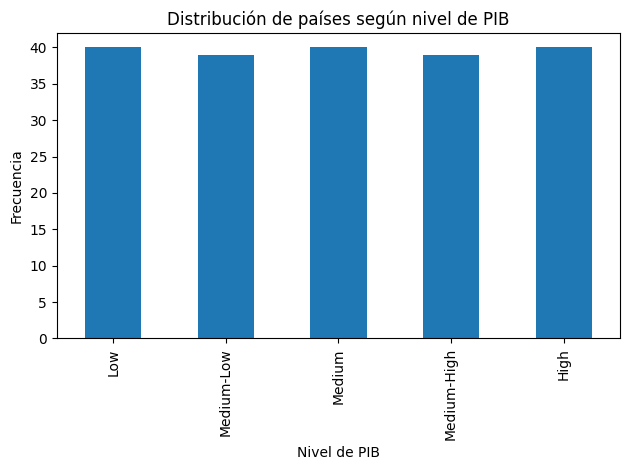

In [82]:
orden = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']

paises['NY.GDP.MKTP.PP.KD'].value_counts().reindex(orden).plot(kind='bar')
plt.xlabel('Nivel de PIB')
plt.ylabel('Frecuencia')
plt.title('Distribución de países según nivel de PIB')
plt.tight_layout()
plt.show()




In [89]:
import plotly.express as px


fig = px.choropleth(
    paises,
    locations='country',
    color='NY.GDP.MKTP.PP.KD',
    hover_name='Country',             # ✅ esta sí existe
    projection='natural earth',
    title='Nivel de PIB por país'
)

fig.update_layout(width=1000, height=600, title_font_size=24)
fig.show()

